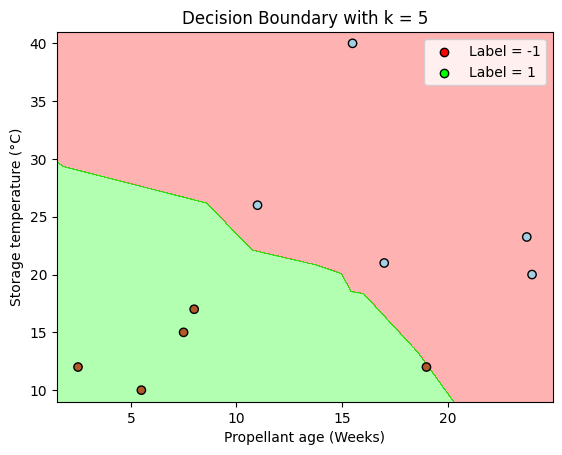

LOOCV Accuracy with k = 5: 0.900
Optimal k: 1


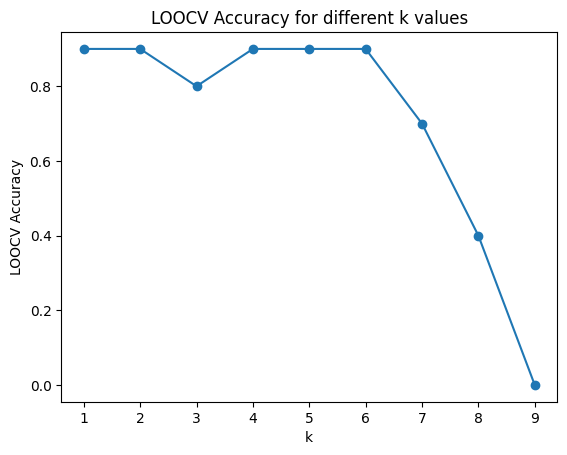

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

#(age,temperature,pass or fail, present in knn or not)
"""
dataset = np.array([
                [15.5,40,-1,0],
                [23.75,23.25,-1,0],
                [8,17,1,0],
                [17,21,-1,0],
                [5.5,10,1,0],
                [19,12,-1,0],
                [24,20,-1,0],
                [2.5,12,1,0],
                [7.5,15,1,0],
                [11,26,-1,0]])
"""
# Define the dataset
dataset = np.array([
    [15.5, 40, 0],
    [23.75, 23.25, 0],
    [8, 17, 1],
    [17, 21, 0],
    [5.5, 10, 1],
    [19, 12, 1],
    [24, 20, 0],
    [2.5, 12, 1],
    [7.5, 15, 1],
    [11, 26, 0]
])
# Features and labels
features=dataset[:, :2]
labels=dataset[:, 2]

# Create a kNN classifier with 5 neighbors
k=5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(features, labels)

min_x=features[0][0]
min_y=features[0][1]
max_x=features[0][0]
max_y=features[0][1]
for it in dataset:
    min_x=min(min_x,it[0])
    min_y=min(min_y,it[1])
    max_x=max(max_x,it[0])
    max_y=max(max_y,it[1])
#print(min_x)
#print(min_y)
#print(max_x)
#print(max_y)
min_x=min_x-1
min_y=min_y-1
max_x=max_x+1
max_y=max_y+1

resolution_x=(max_x-min_x)/1920
resolution_y=(max_y-min_y)/1080

values_x=[]
values_y=[]
for i in range(int((max_x-min_x)/resolution_x)):
    values_x.append(min_x+i*resolution_x)
for i in range(int((max_y-min_y)/resolution_y)):
    values_y.append(min_y+i*resolution_y)

# Create a mesh grid
xx, yy = np.meshgrid(values_x, values_y)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Example data
# Assuming `xx`, `yy`, `Z`, `features`, `labels`, and `k` are already defined

plt.figure()

# Define vibrant colors for decision regions
vibrant_red = '#FF0000'  # Bright Red
vibrant_green = '#00FF00'  # Bright Green

# Create a colormap with vibrant colors
cmap = ListedColormap([vibrant_red, vibrant_green])

# Create the contour plot with the custom colormap for decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

# Scatter plot with original colors for data points
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', cmap=plt.cm.Paired)

# Create a custom legend
plt.scatter([], [], c=vibrant_red, edgecolor='k', label='Label = -1', marker='o')
plt.scatter([], [], c=vibrant_green, edgecolor='k', label='Label = 1', marker='o')

# Add legend
plt.legend()

# Labels and title
plt.xlabel('Propellant age (Weeks)')
plt.ylabel('Storage temperature (°C)')
plt.title(f'Decision Boundary with k = {k}')

# Show the plot
plt.show()

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
accuracy = []
for train_index, test_index in loo.split(features):
    f_train, f_test = features[train_index], features[test_index]
    l_train, l_test = labels[train_index], labels[test_index]
    knn.fit(f_train, l_train)
    l_pred = knn.predict(f_test)
    accuracy.append(accuracy_score(l_test, l_pred))

average_accuracy = np.mean(accuracy)
print(f'LOOCV Accuracy with k = {k}: {average_accuracy:.3f}')

# Find the optimum k
accuracies = []
k_values = range(1, 10)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = []
    for train_index, test_index in loo.split(features):
        f_train, f_test = features[train_index], features[test_index]
        l_train, l_test = labels[train_index], labels[test_index]
        knn.fit(f_train, l_train)
        l_pred = knn.predict(f_test)
        accuracy.append(accuracy_score(l_test, l_pred))
    accuracies.append(np.mean(accuracy))

optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('LOOCV Accuracy')
plt.title('LOOCV Accuracy for different k values')
plt.show()
